<a href="https://colab.research.google.com/github/speacock103/AIFall2019/blob/master/hw2/HW2P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading cifar10 data set and formatting data for model

In [0]:
#imports
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

#cifar10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

#normalize data
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

#categorize labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Using TensorFlow backend.


170500096/170498071 [==============================] - 12s 0us/step


# Model to Underfit cifar10 data

Train on 10000 samples, validate on 10000 samples
Epoch 1/10
10000/10000 [==============================] - 9s 940us/step - loss: 2.2107 - acc: 0.1602 - val_loss: 2.0105 - val_acc: 0.2337
Epoch 2/10
10000/10000 [==============================] - 9s 864us/step - loss: 1.9942 - acc: 0.2442 - val_loss: 1.8063 - val_acc: 0.3594
Epoch 3/10
10000/10000 [==============================] - 9s 859us/step - loss: 1.8672 - acc: 0.2890 - val_loss: 1.7124 - val_acc: 0.3897
Epoch 4/10
10000/10000 [==============================] - 9s 863us/step - loss: 1.7819 - acc: 0.3223 - val_loss: 1.6508 - val_acc: 0.4201
Epoch 5/10
10000/10000 [==============================] - 9s 865us/step - loss: 1.7307 - acc: 0.3452 - val_loss: 1.5696 - val_acc: 0.4285
Epoch 6/10
10000/10000 [==============================] - 9s 853us/step - loss: 1.6938 - acc: 0.3593 - val_loss: 1.5751 - val_acc: 0.4425
Epoch 7/10
10000/10000 [==============================] - 9s 865us/step - loss: 1.6698 - acc: 0.3702 - val_loss: 1.5660 - 

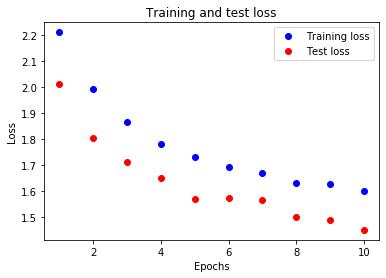

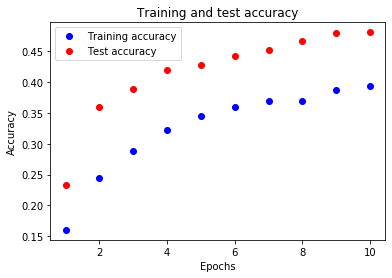

In [5]:
#use only portion of training data, with less training data model has less room to learn, could produce underfitting
train_images_less = np.zeros((10000, 32 , 32, 3))
train_labels_less = np.zeros((10000, 10))
i = 0
j = 0
while (i < 50000):
  train_images_less[j] = train_images[i]
  train_labels_less[j] = train_labels[i]
  i = i + 5
  j = j + 1

#instantiate model
underfit = models.Sequential()

#add layers. in attempt to underfit, using simple model with few convulutional nodes
underfit.add(layers.Conv2D(16, (3,3), activation='relu', input_shape=(32, 32, 3)))
underfit.add(layers.MaxPooling2D((2, 2)))
underfit.add(layers.Conv2D(32, (3,3), activation='relu'))
underfit.add(layers.MaxPooling2D((2, 2)))
underfit.add(layers.Flatten())
underfit.add(layers.Dense(28, activation='relu'))
underfit.add(layers.Dropout(.4))
underfit.add(layers.Dense(10, activation='softmax'))

#compile model
underfit.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
epochs = 10

#store resuls of model fitting to view graphically
results_underfit = underfit.fit(train_images_less, train_labels_less, epochs=epochs, batch_size = 64, validation_data=(test_images, test_labels))

underfit.summary()

#view results of how the model handled data (plotting information derived form Dr. Wocjan's notebook on classifying MNIST digits)
history_dict = results_underfit.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In the graph, we see that the training data maintains a higher loss and lower accuracy than the testing data. The model is underfitting

# Model to Overfit cifar10 data set






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/15





50000/50000 [==============================] - 202s 4ms/step - loss: 1.5995 - acc: 0.4245 - val_loss: 1.3789 - val_acc: 0.5156
Epoch 2/15
50000/50000 [==============================] - 203s 4ms/step - loss: 1.2742 - acc: 0.5487 - val_loss: 1.2835 - val_acc: 0.5491
Epoch 3/15
50000/50000 [==============================] - 200s 4ms/step - loss: 1.1248 - acc: 0.6030 - val_loss: 1.1624 - val_acc: 0.5940
Epoch 4/15
50000/50000 [==============================] - 199s 4ms/step - loss: 1.0091 - acc: 0.6470 - val_loss: 1.1184 - val_acc: 0.6119
Epoch 5/15
50000/50000 [==============================] - 199s 4ms/step - loss: 0.9279 - acc: 0.6752 - val_loss: 1.1081 - val_acc: 0.6150
Epoch 6/15
50000/50000 [==============================] - 199s 4ms/step - loss: 0.8514 - acc: 0.7030 - val_loss: 1.0806 - val_acc: 0.6297
Epoch 7/15
5000

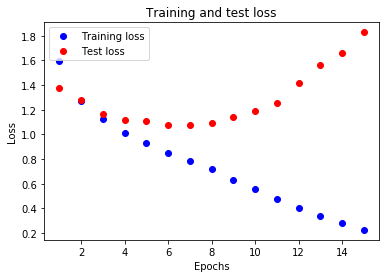

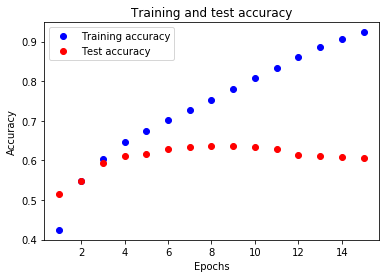

In [0]:
#instantiate model
overfit = models.Sequential()

#add layers to model
#in attempt to overfit, use large amount of nodes and no maxpooling or dropout of data between layers
overfit.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 3)))
overfit.add(layers.Conv2D(32, (3,3), activation='relu'))
overfit.add(layers.Flatten())
overfit.add(layers.Dense(64, activation='relu'))
overfit.add(layers.Dense(10, activation='softmax'))

#compile model
overfit.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
epochs = 15

#store results of fitting model with data to view graphically
results_overfit = overfit.fit(train_images, train_labels, epochs=epochs, batch_size = 128, validation_data=(test_images, test_labels))

#view results of how the model handled data (plotting information derived form Dr. Wocjan's notebook on classifying MNIST digits)
history_dict = results_overfit.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In the graph, after about epoch 6, we can see a noticeable difference forming between the training data and the validation data. The model is forming more to the training data, and there is a peak in how low the loss and how high the accuracy gets for the validation data. The difference grows very large by epoch 10

# Attempt to make a well fitted model for cifar10 data set

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 79s 2ms/step - loss: 1.9026 - acc: 0.3142 - val_loss: 1.6776 - val_acc: 0.3910
Epoch 2/15
50000/50000 [==============================] - 77s 2ms/step - loss: 1.5453 - acc: 0.4458 - val_loss: 1.4729 - val_acc: 0.4805
Epoch 3/15
50000/50000 [==============================] - 77s 2ms/step - loss: 1.4233 - acc: 0.4930 - val_loss: 1.4073 - val_acc: 0.4959
Epoch 4/15
50000/50000 [==============================] - 77s 2ms/step - loss: 1.3556 - acc: 0.5208 - val_loss: 1.3403 - val_acc: 0.5229
Epoch 5/15
50000/50000 [==============================] - 77s 2ms/step - loss: 1.3040 - acc: 0.5396 - val_loss: 1.3234 - val_acc: 0.5310
Epoch 6/15
50000/50000 [==============================] - 77s 2ms/step - loss: 1.2570 - acc: 0.5570 - val_loss: 1.3660 - val_acc: 0.5084
Epoch 7/15
50000/50000 [==============================] - 77s 2ms/step - loss: 1.2242 - acc: 0.5732 - val_loss: 1.2366 - val_acc

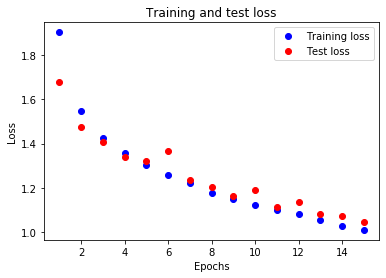

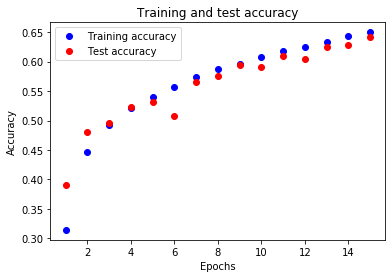

In [12]:
#instantiate model
model = models.Sequential()

#add layers to model
#to attempt a good fitting, vary nodes amount and utilize max pooling with convulutional layers
#with the dense layers use dropout
model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

#compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
epochs = 15

#store results of model fitting to view graphically
results_model = model.fit(train_images, train_labels, epochs=epochs, batch_size = 520, validation_data=(test_images, test_labels))

#view results of how the model handled data (plotting information derived form Dr. Wocjan's notebook on classifying MNIST digits)
history_dict = results_model.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In the graphs, we see both sets of data fall relatively close to one another. The model is following a good fit, however the accuracy and loss could be improved upon. This could be done through more epochs and messing around some with the hidden layers.